# ASL Decoding Model

In [1]:
import cv2
import mediapipe as mp
import pandas as pd
import csv

/Users/juancarlostapiabaeza/Desktop/Projects/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1.Hand recognition

<img src = "https://mediapipe.dev/images/mobile/hand_landmarks.png" />

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
cap = cv2.VideoCapture(1)
last_result = None

with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        # Read from camera
        ret, frame = cap.read()

        # Flip frame
        frame = cv2.flip(frame, 1)

        # Convert from bgr 2 rgb
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Set flags to false
        image.flags.writeable = False

        # Make detectionsq
        results = holistic.process(image)

        if results:
            last_result = results

        # Set flags back to true
        image.flags.writeable = True

        # Draw left hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Draw right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Set image back to bgr
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show image
        cv2.imshow('Hand detection', image)

        if cv2.waitKey(10) & 0XFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

2024-04-23 19:38:50.812 Python[1081:9982] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1713922732.227033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2024-04-23 19:38:52.483 Python[1081:9982] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


-1

## 2. Create dataset and instantiate features and class names

In [24]:
# Landmarks
last_result.left_hand_landmarks

landmark {
  x: 0.4758989
  y: 0.7740601
  z: 5.320567e-08
}
landmark {
  x: 0.41512576
  y: 0.7467324
  z: -0.009964755
}
landmark {
  x: 0.37169492
  y: 0.6574275
  z: -0.009081029
}
landmark {
  x: 0.34639916
  y: 0.5823477
  z: -0.010294845
}
landmark {
  x: 0.31945592
  y: 0.5393158
  z: -0.011937131
}
landmark {
  x: 0.41309357
  y: 0.52470523
  z: 0.00980965
}
landmark {
  x: 0.37973207
  y: 0.4356139
  z: -0.0003757576
}
landmark {
  x: 0.35378975
  y: 0.37690076
  z: -0.012006781
}
landmark {
  x: 0.3320316
  y: 0.32368052
  z: -0.021957869
}
landmark {
  x: 0.44135132
  y: 0.49534974
  z: 0.0018993105
}
landmark {
  x: 0.41759875
  y: 0.38360474
  z: -0.008722845
}
landmark {
  x: 0.39525065
  y: 0.30968037
  z: -0.021813495
}
landmark {
  x: 0.376227
  y: 0.2491917
  z: -0.03176197
}
landmark {
  x: 0.47102052
  y: 0.48778313
  z: -0.0098778345
}
landmark {
  x: 0.45610815
  y: 0.37035257
  z: -0.023823006
}
landmark {
  x: 0.43764186
  y: 0.2980523
  z: -0.03652659
}
landma

In [25]:
# Number of landmarks
number_of_hand_landmarks = len(last_result.left_hand_landmarks.landmark)
number_of_hand_landmarks

21

In [26]:
# Create names of columns
features = ['class']
for val in range(1, number_of_hand_landmarks+1):
    features += [f'x{val}', f'y{val}', f'z{val}', f'v{val}']

features

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21']

In [27]:
import csv
with open('coords.csv', 'w', newline = '') as f:
    csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    csv_writer.writerow(features)

In [28]:
import string
letters = list(string.ascii_uppercase)
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [29]:
numbers = [str(num) for num in range(0, 10)]
numbers

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [30]:
class_names = letters + numbers
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

## 3. Create instances per each class
I will keep 600 images per each class/sign

In [4]:
import csv

In [4]:
# Function to generate 300 images of a certain class
def generate_data(class_name, hand):
    num_of_data = 0
    cap = cv2.VideoCapture(1)
    last_result = None
    
    with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
        while cap.isOpened():
    
            # Read from camera
            ret, frame = cap.read()
    
            # Flip frame
            frame = cv2.flip(frame, 1)
    
            # Convert from bgr 2 rgb
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
            # Set flags to false
            image.flags.writeable = False
    
            # Make detectionsq
            results = holistic.process(image)
    
            if results:
                last_result = results
    
            # Set flags back to true
            image.flags.writeable = True
            try:
                if hand == 'left':
                    row = [class_name]
                    for num, landmark in enumerate(results.left_hand_landmarks.landmark):
                        row += [landmark.x, landmark.y, landmark.z, landmark.visibility]
                    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
                else:
                    row = [class_name]
                    for num, landmark in enumerate(results.right_hand_landmarks.landmark):
                        row += [landmark.x, landmark.y, landmark.z, landmark.visibility]
                    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                with open('coords.csv', mode = 'a', newline = '') as f:
                    csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
                num_of_data += 1
                if num_of_data == 400:
                    break
            except Exception as error:
                pass
            # Set image back to bgr
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
            # Show image
            cv2.imshow('Hand detection', image)
    
            if cv2.waitKey(10) & 0XFF == ord('q'):
                break
    
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

### A

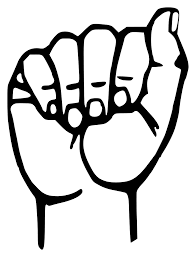

In [33]:
# Generate 400 with left hand
generate_data('A', 'left')

I0000 00:00:1707610859.440601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'


In [35]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    400
Name: count, dtype: int64

In [36]:
# Generate 400 with right hand
generate_data('A', 'right')

I0000 00:00:1707610997.142627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [38]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
Name: count, dtype: int64

### B

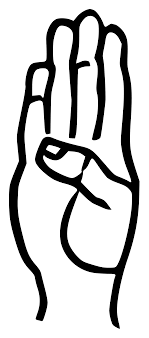

In [40]:
# Generate 400 with left hand
generate_data('B', 'left')

I0000 00:00:1707611140.313695       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'


In [42]:
# Generate 400 with right hand
generate_data('B', 'right')

I0000 00:00:1707611211.992631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute

In [44]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
Name: count, dtype: int64

### C

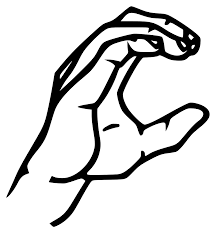

In [45]:
# Generate 400 with left hand
generate_data('C', 'left')

I0000 00:00:1707611354.811552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [46]:
# Generate 400 with right hand
generate_data('C', 'right')

I0000 00:00:1707611398.899765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [47]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
Name: count, dtype: int64

### D

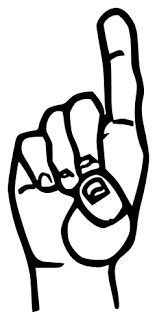

In [48]:
# Generate 400 with left hand
generate_data('D', 'left')

I0000 00:00:1707611534.676170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [49]:
# Generate 400 with right hand
generate_data('D', 'right')

I0000 00:00:1707611588.310033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [50]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
Name: count, dtype: int64

### E

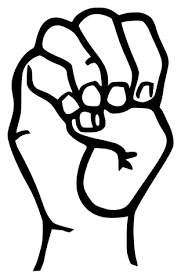

In [51]:
# Generate 400 with left hand
generate_data('E', 'left')

I0000 00:00:1707611743.961509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [52]:
# Generate 400 with right hand
generate_data('E', 'right')

I0000 00:00:1707611796.468629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [53]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
Name: count, dtype: int64

### F

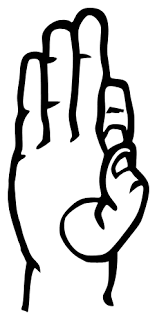

In [20]:
# Generate 400 with left hand
generate_data('F', 'left')

I0000 00:00:1707683107.698529       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [21]:
# Generate 400 with right hand
generate_data('F', 'right')

I0000 00:00:1707683157.112811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [22]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
Name: count, dtype: int64

### G

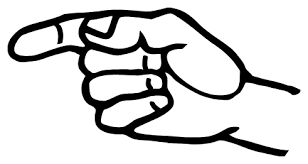

In [33]:
# Generate 400 with left hand
generate_data('G', 'left')

I0000 00:00:1707683338.659927       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [34]:
# Generate 400 with right hand
generate_data('G', 'right')

I0000 00:00:1707683388.776859       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [35]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
Name: count, dtype: int64

### H

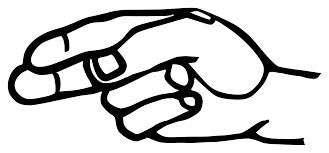

In [36]:
# Generate 400 with left hand
generate_data('H', 'left')

I0000 00:00:1707683633.473727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [37]:
# Generate 400 with right hand
generate_data('H', 'right')

I0000 00:00:1707683680.866639       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [38]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
Name: count, dtype: int64

### I

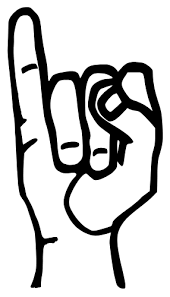

In [18]:
# Generate 400 with left hand
generate_data('I', 'left')

I0000 00:00:1707757686.070618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [19]:
# Generate 400 with right hand
generate_data('I', 'right')

I0000 00:00:1707757750.686652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [20]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
Name: count, dtype: int64

### K

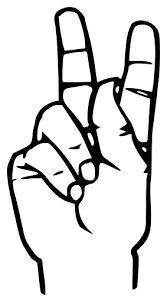

In [21]:
# Generate 400 with left hand
generate_data('K', 'left')

I0000 00:00:1707758067.092481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [22]:
# Generate 400 with right hand
generate_data('K', 'right')

I0000 00:00:1707758150.565439       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [23]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
Name: count, dtype: int64

### L

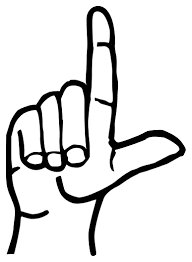


In [13]:
# Generate 400 with left hand
generate_data('L', 'left')

2024-04-23 20:35:18.352 Python[1078:9341] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1713926119.751653       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2024-04-23 20:35:19.999 Python[1078:9341] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


In [14]:
# Generate 400 with right hand
generate_data('L', 'right')

I0000 00:00:1713926157.457599       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [15]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
Name: count, dtype: int64

### M

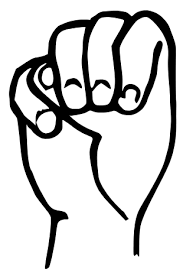

In [17]:
# Generate 400 with left hand
generate_data('M', 'left')

I0000 00:00:1713927529.479205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [18]:
# Generate 400 with right hand
generate_data('M', 'right')

I0000 00:00:1713927567.319975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [19]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
Name: count, dtype: int64

### N

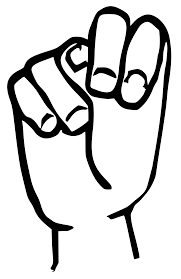

In [33]:
# Generate 400 with left hand
generate_data('N', 'left')

I0000 00:00:1713928118.724263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [ ]:
# Generate 400 with right hand
generate_data('N', 'right')

I0000 00:00:1713928153.121462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [36]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
Name: count, dtype: int64

### O

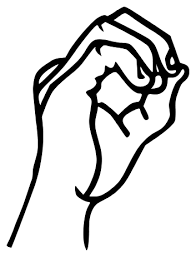

In [37]:
# Generate 400 with left hand
generate_data('O', 'left')

I0000 00:00:1713928532.195573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [38]:
# Generate 400 with right hand
generate_data('O', 'right')

I0000 00:00:1713928568.017636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [39]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
Name: count, dtype: int64

### P

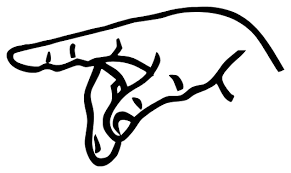

In [40]:
# Generate 400 with left hand
generate_data('P', 'left')

I0000 00:00:1713928800.924016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [41]:
# Generate 400 with right hand
generate_data('P', 'right')

I0000 00:00:1713928836.811807       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [42]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
P    800
Name: count, dtype: int64

### Q

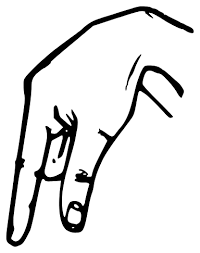

In [43]:
# Generate 400 with left hand
generate_data('Q', 'left')

I0000 00:00:1713929099.995148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [44]:
# Generate 400 with right hand
generate_data('Q', 'right')

I0000 00:00:1713929222.019101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [45]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
P    800
Q    800
Name: count, dtype: int64

### R

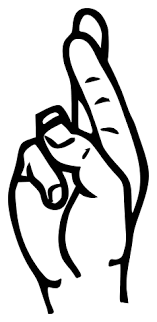

In [46]:
# Generate 400 with left hand
generate_data('R', 'left')

I0000 00:00:1713929543.116277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [47]:
# Generate 400 with right hand
generate_data('R', 'right')

I0000 00:00:1713929596.316074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [48]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
K    800
Q    800
P    800
O    800
N    800
M    800
L    800
I    800
B    800
H    800
G    800
F    800
E    800
D    800
C    800
R    800
Name: count, dtype: int64

### S

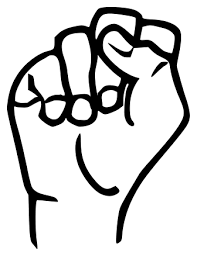

In [49]:
# Generate 400 with left hand
generate_data('S', 'left')

I0000 00:00:1713929976.651597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [50]:
# Generate 400 with right hand
generate_data('S', 'right')

I0000 00:00:1713930013.435379       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [51]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
B    800
R    800
Q    800
P    800
O    800
N    800
M    800
L    800
K    800
I    800
H    800
G    800
F    800
E    800
D    800
C    800
S    800
Name: count, dtype: int64

### T

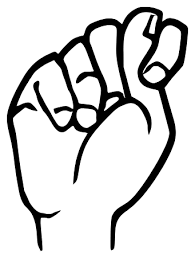

In [52]:
# Generate 400 with left hand
generate_data('T', 'left')

I0000 00:00:1713930173.972229       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [53]:
# Generate 400 with right hand
generate_data('T', 'right')

I0000 00:00:1713930205.473591       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [54]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts()

class
A    800
L    800
S    800
R    800
Q    800
P    800
O    800
N    800
M    800
K    800
B    800
I    800
H    800
G    800
F    800
E    800
D    800
C    800
T    800
Name: count, dtype: int64

### U

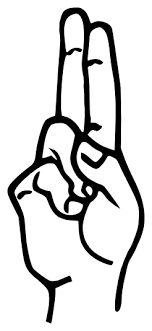

In [55]:
# Generate 400 with left hand
generate_data('U', 'left')

I0000 00:00:1713930564.759269       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [56]:
# Generate 400 with right hand
generate_data('U', 'right')

I0000 00:00:1713930598.448073       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [60]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts().sort_index()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
P    800
Q    800
R    800
S    800
T    800
U    800
Name: count, dtype: int64

### V

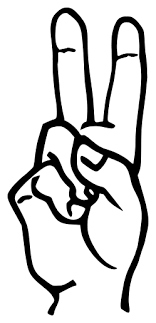

In [5]:
# Generate 400 with left hand
generate_data('V', 'left')

2024-04-23 21:57:36.635 Python[1519:59014] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1713931058.026442       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2024-04-23 21:57:38.214 Python[1519:59014] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


In [6]:
# Generate 400 with right hand
generate_data('V', 'right')

I0000 00:00:1713931092.650055       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [7]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts().sort_index()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
P    800
Q    800
R    800
S    800
T    800
U    800
V    800
Name: count, dtype: int64

### W

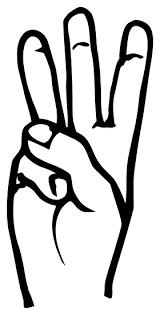

In [8]:
# Generate 400 with left hand
generate_data('W', 'left')

I0000 00:00:1713931272.678396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [10]:
# Generate 400 with right hand
generate_data('W', 'right')

I0000 00:00:1713931440.217753       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [11]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts().sort_index()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
P    800
Q    800
R    800
S    800
T    800
U    800
V    800
W    800
Name: count, dtype: int64

### X

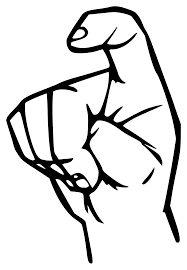

In [12]:
# Generate 400 with left hand
generate_data('X', 'left')

I0000 00:00:1713932167.275958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [13]:
# Generate 400 with right hand
generate_data('X', 'right')

I0000 00:00:1713932202.257153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [14]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts().sort_index()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
P    800
Q    800
R    800
S    800
T    800
U    800
V    800
W    800
X    800
Name: count, dtype: int64

### Y

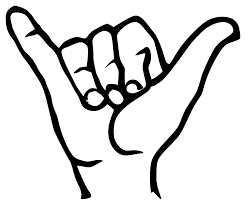

In [15]:
# Generate 400 with left hand
generate_data('Y', 'left')

I0000 00:00:1713932323.555209       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [16]:
# Generate 400 with right hand
generate_data('Y', 'right')

I0000 00:00:1713932355.489259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


In [17]:
# Check if items were saved correctly
df = pd.read_csv('coords.csv')
df['class'].value_counts().sort_index()

class
A    800
B    800
C    800
D    800
E    800
F    800
G    800
H    800
I    800
K    800
L    800
M    800
N    800
O    800
P    800
Q    800
R    800
S    800
T    800
U    800
V    800
W    800
X    800
Y    800
Name: count, dtype: int64

## Data Processing and Model fitting

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('coords.csv')

In [6]:
X = df.drop('class', axis = 1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [8]:
models = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression(max_iter = 300)),
    'rc': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gbc': make_pipeline(StandardScaler(), GradientBoostingClassifier())
}

fit_models = {}

for algo, model in models.items():
    fit_models[algo] = model.fit(X_train, y_train)

In [9]:
for algo, model in fit_models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(algo, acc)

lr 0.9855902777777777
rc 0.9793402777777778
gbc 0.9621527777777777


## Testing in Real Time

In [10]:
import cv2
import mediapipe as mp
import csv

In [11]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [13]:
# Load nlp library for text correction
!pip3 install transformers
from transformers import pipeline

In [14]:
# Load model
fix_spelling = pipeline(task = "text2text-generation", model = "oliverguhr/spelling-correction-english-base")

# Example of execution
clean_text = fix_spelling("Ilikepizza", max_length = 2048)

# Generation
clean_text[0]['generated_text']

All PyTorch model weights were used when initializing TFBartForConditionalGeneration.

All the weights of TFBartForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForConditionalGeneration for predictions without further training.


'I like pizza.'

In [20]:
import time
cap = cv2.VideoCapture(1)

phrase = ""
last_letter = None
letter_added = False
start = time.time()
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        # Flip image
        image = cv2.flip(frame, 1)

        # Convert from bgr 2 rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        image.flags.writeable = False

        results = holistic.process(image)

        image.flags.writeable = True
        
        
        try:
            row = []
            for num, landmark in enumerate(results.left_hand_landmarks.landmark):
                row += [landmark.x, landmark.y, landmark.z, landmark.visibility]

            row = pd.DataFrame([row])
            preds = fit_models['lr'].predict(row)[0]
            predict_proba = fit_models['lr'].predict_proba(row)[0]
            predict_proba = max(predict_proba)
            cv2.rectangle(image, (0,0), (500, 100), (0, 0, 255), -1)
            cv2.putText(image, preds, (5, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
            cv2.putText(image, str(round(predict_proba,2)), (100, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            if preds == last_letter:
                end = time.time()
                if end - start > 1:
                    phrase += preds
                    letter_added = True
                    start = end
            else:
                last_letter = preds
                start = time.time()

            
        except Exception as error:
            if last_letter is not None:
                last_letter = None
                start = time.time()
            pass    

        cv2.rectangle(image, (700,0), (1600, 100), (0, 0, 255), -1)
        if phrase:
            phrase = phrase.title()
            
            if not last_letter and time.time()-start > 2 and letter_added:
                letter_added = False
                clean_text = fix_spelling(phrase, max_length = 20)
                phrase = clean_text[0]['generated_text']
                phrase = phrase.replace('.','')
                
            cv2.putText(image, phrase, (705, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        cv2.imshow('ASL', image)
        if cv2.waitKey(10) & 0XFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


I0000 00:00:1713975693.766606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
/Users/juancarlostapiabaeza/Desktop/Projects/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/juancarlostapiabaeza/Desktop/Projects/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/juancarlostapiabaeza/Desktop/Projects/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/juancarlostapiabaeza/Desktop/Projects/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/juancarlostapiabaeza/Deskto

-1

In [19]:
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1